**Name**: Saniya Bangare
**UID**: 2021300009 
**Class**: BE Comps

# Housing Dataset

# Dataset

You can view the dataset from [this link](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset).

## Description
This dataset contains information about house prices and various factors influencing them. It includes features such as area, number of bedrooms and bathrooms, stories, presence of amenities (guest room, basement, hot water heating, air conditioning), parking availability, preferred area, and furnishing status. The dataset aims to explore the relationships between these factors and house prices.

## Metadata

| Variable | Description | Data Type |
|---|---|---|
| price | Price of the house | Numeric |
| area | Area of the house (likely in square feet or square meters) | Numeric |
| bedrooms | Number of bedrooms | Numeric |
| bathrooms | Number of bathrooms | Numeric |
| stories | Number of stories in the house | Numeric |
| mainroad | Whether the house is located on a main road (yes/no) | Categorical |
| guestroom | Whether the house has a guest room (yes/no) | Categorical |
| basement | Whether the house has a basement (yes/no) | Categorical |
| hotwaterheating | Whether the house has hot water heating (yes/no) | Categorical |
| airconditioning | Whether the house has air conditioning (yes/no) | Categorical |
| parking | Number of parking spaces | Numeric |
| prefarea | Whether the house is located in a preferred area (yes/no) | Categorical |
| furnishingstatus | Furnishing status of the house (furnished/semi-furnished/unfurnished) | Categorical | 


In [6]:
library(ggplot2)
library(plotly)
library(dplyr)
install.packages("wordcloud")
install.packages("RColorBrewer")
library(wordcloud)
library(RColorBrewer)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: RColorBrewer



In [7]:
df <- read.csv("Housing.csv")

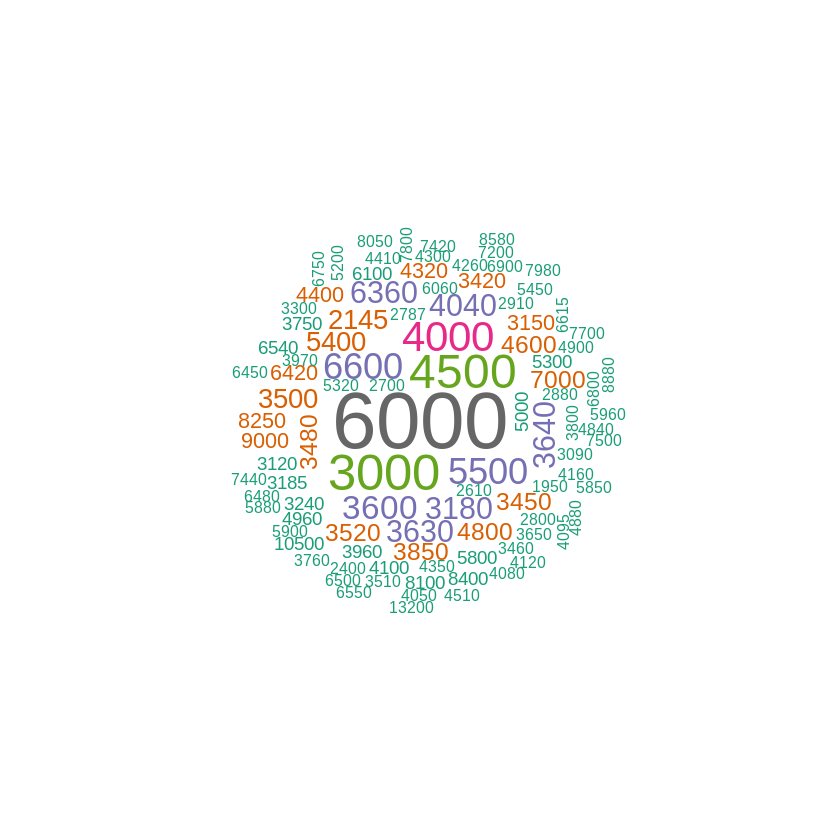

In [8]:
# Generate frequency of areas
area_freq <- table(df$area)

# Set color palette
pal <- brewer.pal(8, "Dark2")

# Create the word cloud
wordcloud(words = names(area_freq), freq = as.numeric(area_freq), min.freq = 1,
          max.words = 100, random.order = FALSE, colors = pal)

**Chart 1: Word Cloud of Housing Areas**

* The most common housing area size appears to be around 6000. 
* There is a concentration of houses with areas between 3000 and 9000.

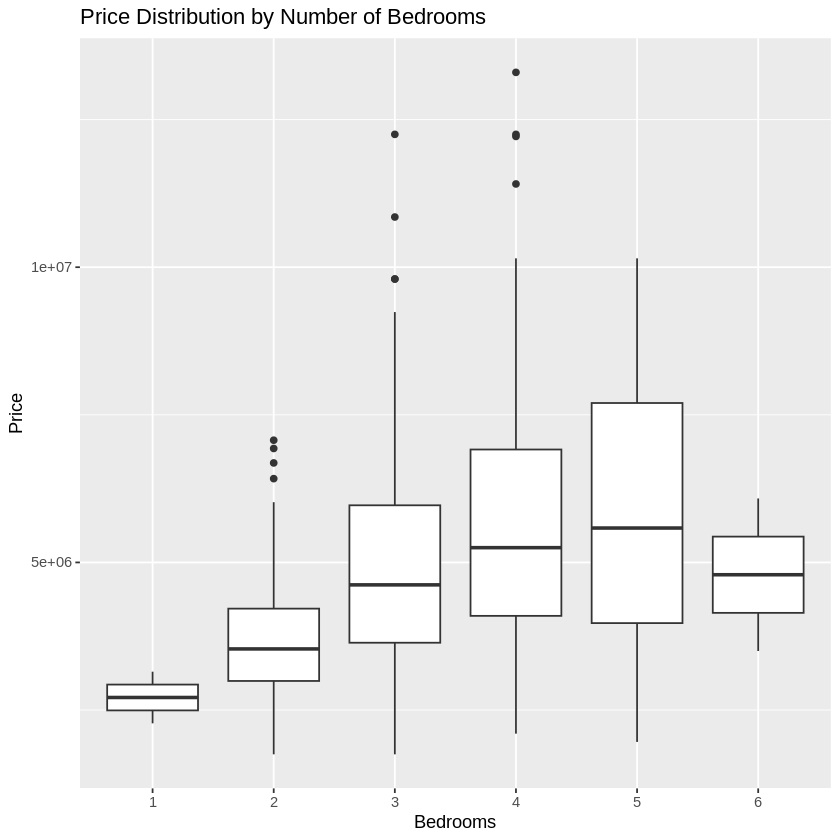

In [16]:
ggplot(df, aes(x = as.factor(bedrooms), y = price)) +
  geom_boxplot() +
  labs(title = "Price Distribution by Number of Bedrooms", x = "Bedrooms", y = "Price")


**Chart 2: Price Distribution by Number of Bedrooms** 

* Houses with more bedrooms tend to have higher prices, but the relationship isn't perfectly linear.
* There are some outlier houses with significantly higher prices, particularly in the 3, 4, and 5-bedroom categories.


Warning message:
“Groups with fewer than two datapoints have been dropped.
ℹ Set `drop = FALSE` to consider such groups for position adjustment purposes.”


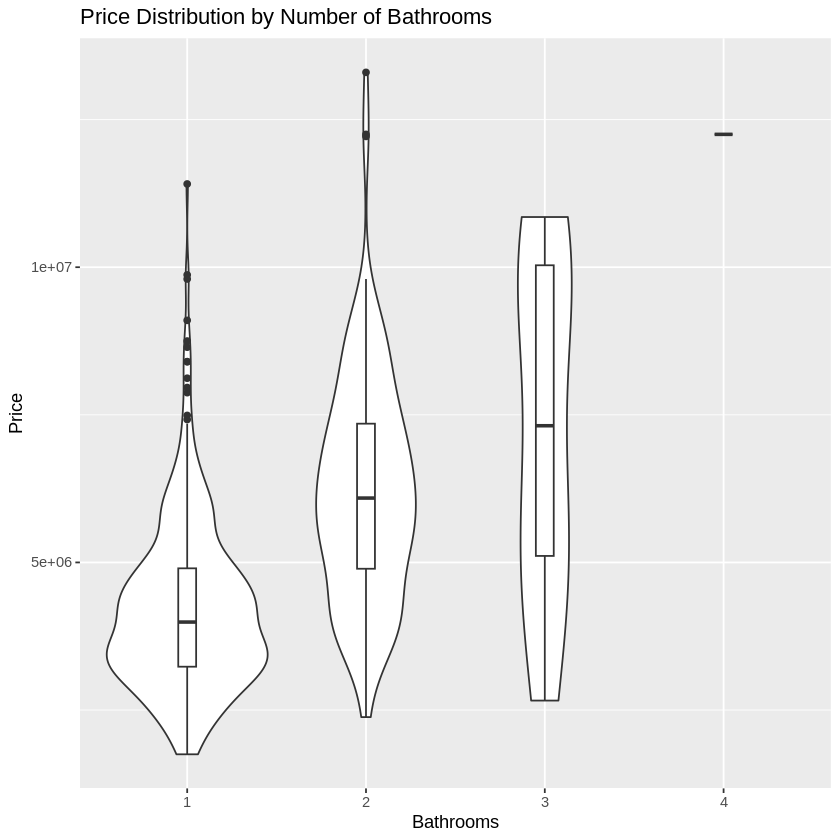

In [17]:
ggplot(df, aes(x = as.factor(bathrooms), y = price)) +
  geom_violin() +
  geom_boxplot(width = 0.1) +
  labs(title = "Price Distribution by Number of Bathrooms", x = "Bathrooms", y = "Price")


**Chart 3: Price Distribution by Number of Bathrooms**

* Similar to bedrooms, more bathrooms generally correspond to higher prices. 
* The distribution for houses with 4 bathrooms is limited, likely due to a smaller sample size.

`geom_smooth()` using formula = 'y ~ x'


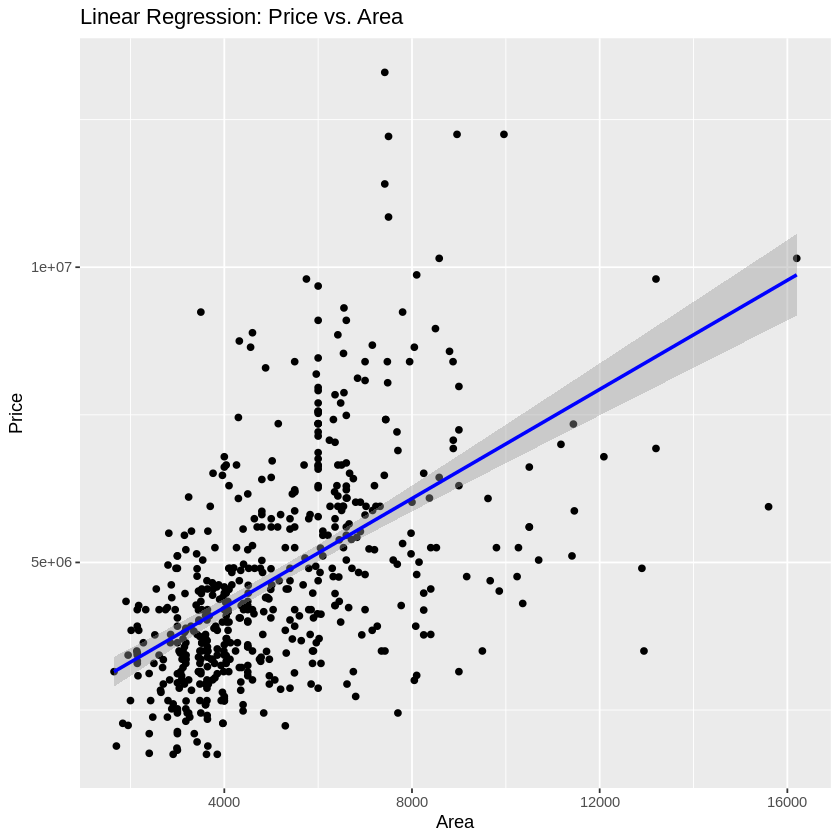

In [18]:
linear_model <- lm(price ~ area, data = df)

ggplot(df, aes(x = area, y = price)) +
  geom_point() +
  geom_smooth(method = "lm", col = "blue") +
  labs(title = "Linear Regression: Price vs. Area", x = "Area", y = "Price")


**Chart 4: Linear Regression: Price vs. Area**

*  A linear relationship exists between price and area, as larger houses tend to be more expensive. 
*  Considerable scatter suggests other factors beyond area are also influencing house prices.


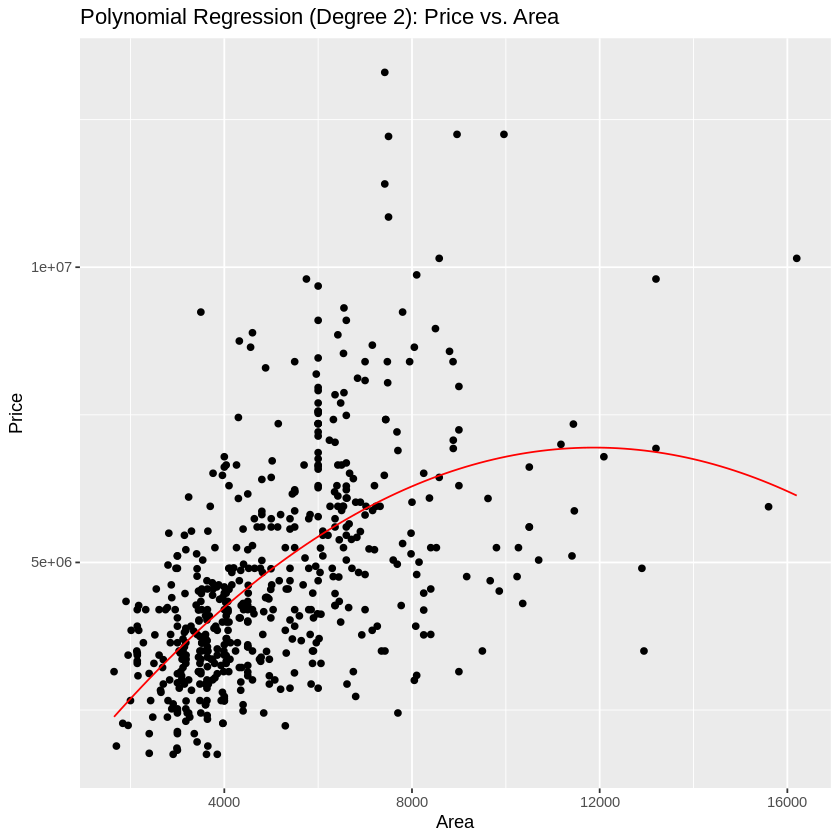

In [22]:
df$area_sq <- df$area^2
poly_model <- lm(price ~ area + area_sq, data = df)

area_seq <- seq(min(df$area), max(df$area), length.out = 100)
pred_df <- data.frame(area = area_seq, area_sq = area_seq^2)
pred_df$price <- predict(poly_model, newdata = pred_df)

ggplot(df, aes(x = area, y = price)) +
  geom_point() +
  geom_line(data = pred_df, aes(x = area, y = price), col = "red") +
  labs(title = "Polynomial Regression (Degree 2): Price vs. Area", x = "Area", y = "Price")

**Chart 5: Polynomial Regression (Degree 2): Price vs. Area** 

*  A polynomial regression might fit the data slightly better than a linear model.
*  The curve suggests prices might not increase linearly with area at the higher end.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



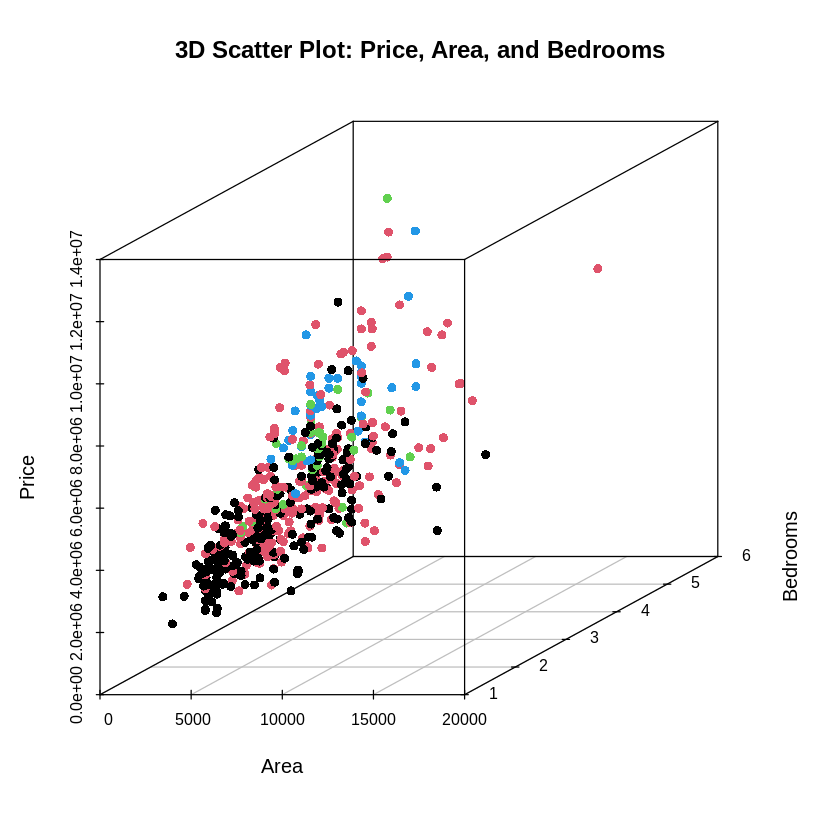

In [28]:
# Install and load scatterplot3d
install.packages("scatterplot3d")
library(scatterplot3d)

# 3D Scatter Plot using scatterplot3d
scatterplot3d(df$area, df$bedrooms, df$price, pch = 16, color = as.numeric(df$stories),
              main = "3D Scatter Plot: Price, Area, and Bedrooms",
              xlab = "Area", ylab = "Bedrooms", zlab = "Price")


**Chart 6: 3D Scatter Plot: Price, Area, and Bedrooms** 

*  The 3D plot confirms the trend of price increasing with both area and number of bedrooms.
*   The clustering of points shows the limited combinations of area and bedrooms that are available.

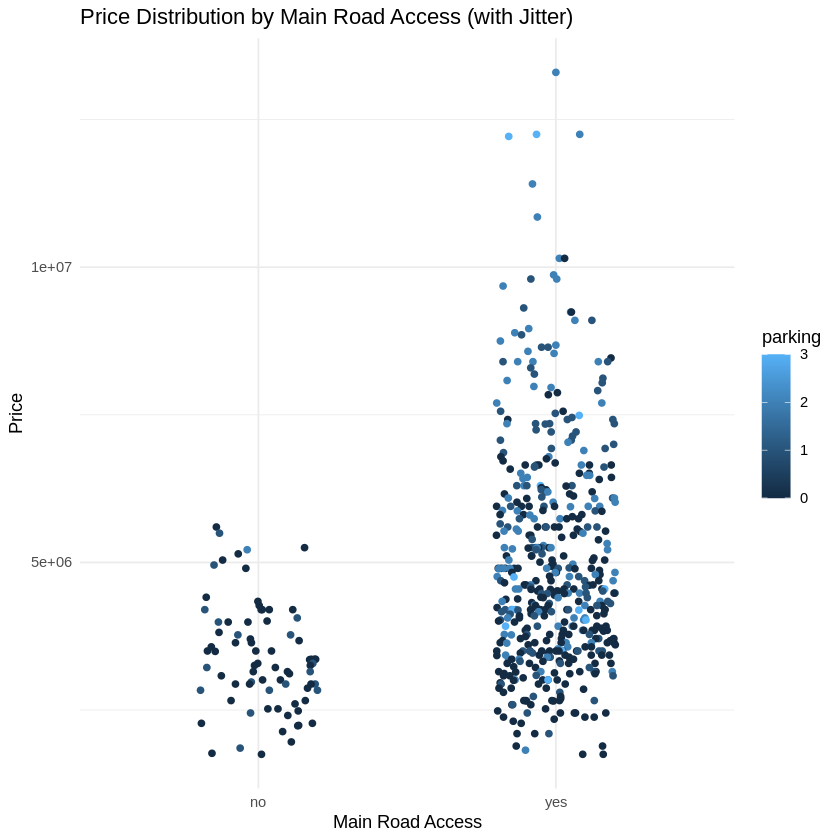

In [25]:
# Jitter Plot for Price Distribution by Mainroad Access
ggplot(df, aes(x = mainroad, y = price, color = parking)) +
  geom_jitter(width = 0.2, height = 0) +
  labs(title = "Price Distribution by Main Road Access (with Jitter)",
       x = "Main Road Access", y = "Price") +
  theme_minimal()


**Chart 7: Price Distribution by Main Road Access (with Jitter)**

*  Houses located on a main road might have slightly higher prices on average. 
*  The jitter highlights the density of data points and overlaps between categories. 